# Alex AI/ML Training V1

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2024-12-01 23:42:25.173995: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-01 23:42:25.184528: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733089345.196207 1598614 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733089345.199292 1598614 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-01 23:42:25.211571: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7327101682778771369
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 112918528
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15079880543492310787
physical_device_desc: "device: 0, name: NVIDIA RTX 500 Ada Generation Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


I0000 00:00:1733089346.595641 1598614 gpu_device.cc:2022] Created device /device:GPU:0 with 107 MB memory:  -> device: 0, name: NVIDIA RTX 500 Ada Generation Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [3]:
#directory path
dir_path = "/home/alexbeat/data/kuopio-gait-dataset-ml"
input_path = f"{dir_path}/_main-input.csv"
output_path = f"{dir_path}/_main-output.csv"

In [31]:
x_og = pd.read_csv(input_path, index_col=0)  # 49 input features
y_og = pd.read_csv(output_path, index_col=0)   # 3 output features (x, y, z)

x_og.drop(columns=['time'], inplace=True)
y_og.drop(columns=['time'], inplace=True)


num_rows = 100000
x = x_og[:num_rows]
y = y_og[:num_rows]

In [44]:
scalerX = StandardScaler()
X = scalerX.fit_transform(x)

# Y = y
scalerY = StandardScaler()
Y = scalerY.fit_transform(y)
print(f"X shape: {X.shape}")
print(f"Y shape: {y.shape}")

X shape: (100000, 49)
Y shape: (100000, 3)


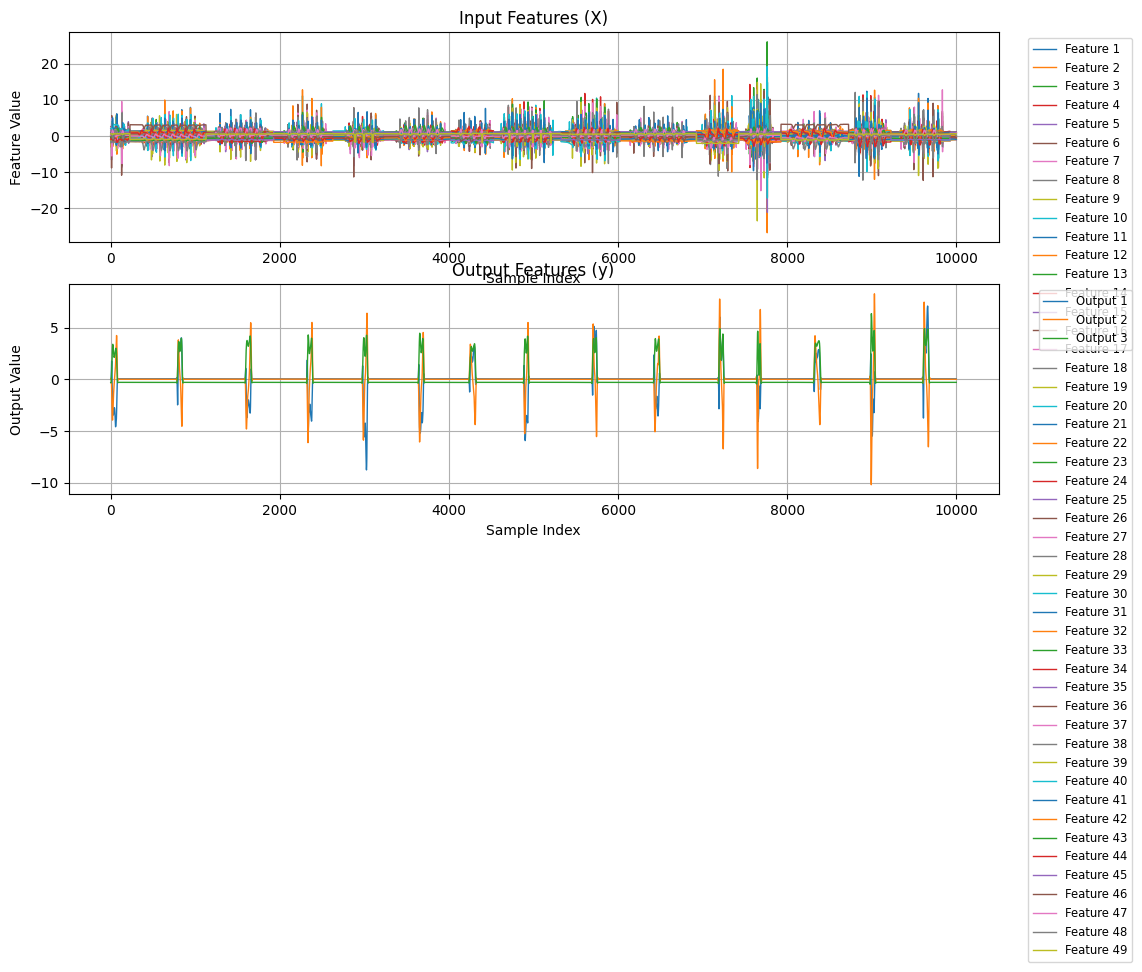

In [46]:
# Create a figure
plt.figure(figsize=(12, 6))

# Plotting the input features (X)
plt.subplot(2, 1, 1)
for i in range(X.shape[1]):  # Loop through each feature (column)
    plt.plot(X[:10000, i], label=f'Feature {i+1}', linewidth=1)
plt.title('Input Features (X)')
plt.xlabel('Sample Index')
plt.ylabel('Feature Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='small')
plt.grid()

# Plotting the output features (y)
plt.subplot(2, 1, 2)
for i in range(Y.shape[1]):  # Loop through each output feature (column)
    plt.plot(Y[:10000, i], label=f'Output {i+1}', linewidth=1)
plt.title('Output Features (y)')
plt.xlabel('Sample Index')
plt.ylabel('Output Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), fontsize='small')
plt.grid()

plt.show()

In [65]:
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(128, activation='relu', input_shape=(49,)))

# Second hidden layer
model.add(Dense(256, activation='relu'))

# Output layer
model.add(Dense(3, activation='linear'))  # Linear activation for regression

/home/alexbeat/AlexDev/ai-imu-grf/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
print(model.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │         6,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,195 (157.01 KB)

 Trainable params: 40,195 (157.01 KB)

 Non-trainable params: 0 (0.00 B)

None


In [72]:
model.fit(X, Y, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - loss: 0.4196 - mae: 0.2888 - val_loss: 0.9826 - val_mae: 0.4328
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step - loss: 0.4072 - mae: 0.2857 - val_loss: 0.9663 - val_mae: 0.4222
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - loss: 0.4007 - mae: 0.2824 - val_loss: 0.9521 - val_mae: 0.4124
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - loss: 0.3939 - mae: 0.2768 - val_loss: 1.0108 - val_mae: 0.4267
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - loss: 0.3782 - mae: 0.2736 - val_loss: 1.0299 - val_mae: 0.4233
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - loss: 0.3708 - mae: 0.2697 - val_loss: 0.9874 - val_mae: 0.4094
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - loss: 0.3626 - mae: 0.2654 - val_loss: 1.0666 - val_mae: 0.4365
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - loss: 0.3479 - mae: 0.2580 - val_loss: 0.9530 - val_mae: 0.3953
Epoch 9/100
1250

In [73]:
x_text_path = f"{dir_path}/input/01-l_comf_01-input.csv"
y_text_path = f"{dir_path}/output/01-l_comf_01-output.csv"
X_test = pd.read_csv(x_text_path, index_col=0)  # 49 input features
y_test = pd.read_csv(y_text_path, index_col=0)   # 3 output features (x, y, z)
X_test.drop(columns=['time'], inplace=True)
y_test.drop(columns=['time'], inplace=True)

# Normalize test data
X_test = scalerX.transform(X_test)
y_test = scalerY.transform(y_test)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5749 - mae: 0.2573     
Test Loss: 1.002420425415039, Test MAE: 0.4178159236907959


In [74]:
predictions = model.predict(X_test)
print(predictions)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[ 0.04696571  0.00396204 -0.29321662]
 [ 0.04696571  0.00396204 -0.29321662]
 [ 0.04696571  0.00396204 -0.29321662]
 ...
 [ 0.04696571  0.00396204 -0.29321662]
 [ 0.04696571  0.00396204 -0.29321662]
 [ 0.04696571  0.00396204 -0.29321662]]


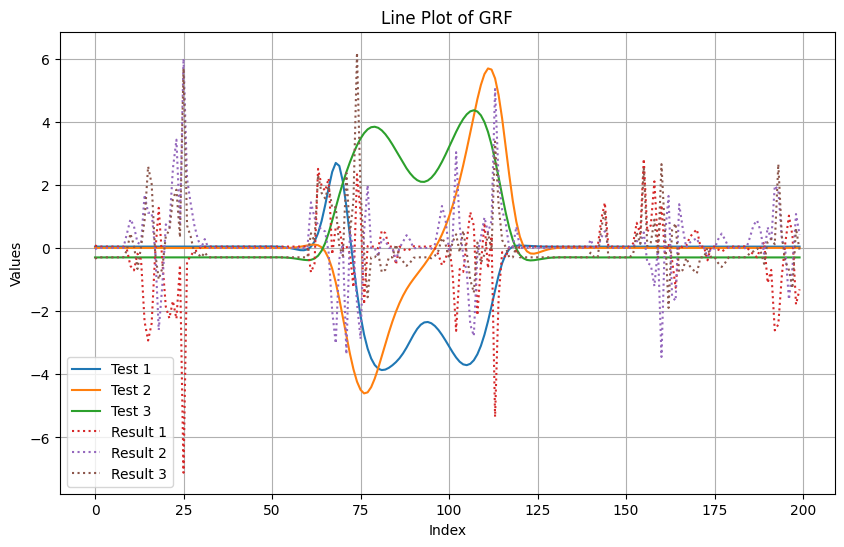

In [76]:
# Plotting the DataFrame
plt.figure(figsize=(10, 6))

for i in range(y_test.shape[1]):  # Loop over the number of columns
    plt.plot(y_test[500:700, i], label=f'Test {i+1}')  # Use marker for visibility

# Plot each column as a separate line
for i in range(predictions.shape[1]):  # Loop over the number of columns
    plt.plot(predictions[500:700, i], label=f'Result {i+1}', linestyle=':')  # Use marker for visibility

# Adding titles and labels
plt.title('Line Plot of GRF')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid()
# plt.yscale('log')  # Optional: Use logarithmic scale for better visibility of small values
plt.show()

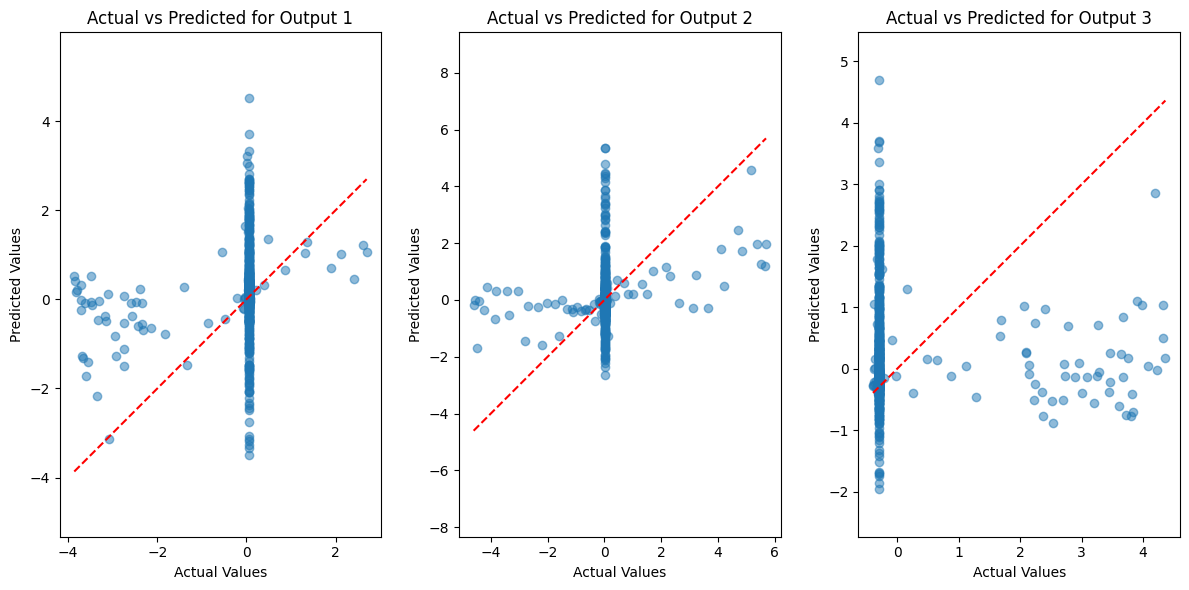

In [71]:
# Create a figure
plt.figure(figsize=(12, 6))
actual_values = y_test
predicted_values = predictions

# Plot actual vs predicted for each output (x, y, z)
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(actual_values[:, i], predicted_values[:, i], alpha=0.5)
    plt.plot([actual_values[:, i].min(), actual_values[:, i].max()],
             [actual_values[:, i].min(), actual_values[:, i].max()], 'r--')  # Diagonal line
    plt.title(f'Actual vs Predicted for Output {i+1}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.axis('equal')

plt.tight_layout()
plt.show()